<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [73]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [74]:
import pandas as pd


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [75]:
data = pd.read_csv('../testcodes/data/prepared_data_book.csv')
data.head()

,id,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,4.56,2.73,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
1,2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,3.63,2.53,7929,Others,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
2,3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,8.86,5.32,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
3,4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,3.33,2.00,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
4,5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,5.70,3.42,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [76]:
# The data was import from Bui Minh Duc's work on kaggle
# https://www.kaggle.com/code/biminhc/data-preparation-eda-tiki-books-dataset/notebook
# It include 1767 books attributes: price, current price, quantity, n_review, rating, pages num and discount
data.describe()

,id,product_id,original_price,current_price,quantity,n_review,avg_rating,pages,discount
count,1767.000000,1.767000e+03,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1766.000000
mean,902.039049,1.161866e+08,6.692586,4.861330,2805.490662,328.848896,4.596491,347.202603,0.272418
std,515.693259,7.248487e+07,5.367041,4.298247,16796.190782,730.947525,1.129788,180.553555,0.135202
min,0.000000,3.353370e+05,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000
25%,456.500000,5.274105e+07,3.760000,2.530000,180.500000,16.000000,4.800000,220.000000,0.200000
50%,902.000000,1.149380e+08,5.440000,3.750000,608.000000,75.000000,4.800000,332.000000,0.300000
75%,1347.500000,1.925865e+08,7.970000,5.760000,2376.000000,304.500000,5.000000,456.000000,0.370000
max,1795.000000,2.079098e+08,65.400000,50.630000,671121.000000,11481.000000,5.000000,2004.000000,0.800000


In [77]:
data.dtypes

id                  int64
product_id          int64
title              object
authors            object
original_price    float64
current_price     float64
quantity            int64
category           object
n_review            int64
avg_rating        float64
pages               int64
manufacturer       object
cover_link         object
discount          float64
dtype: object

In [78]:
# there is one null item on discount, fill it with 0
data.fillna(0, inplace=True)
data.isnull().sum()

id                0
product_id        0
title             0
authors           0
original_price    0
current_price     0
quantity          0
category          0
n_review          0
avg_rating        0
pages             0
manufacturer      0
cover_link        0
discount          0
dtype: int64

In [79]:
data.columns
data['author_nbook'] = data.groupby('authors')['authors'].transform('count')
data.loc[data["authors"] == "Unknown", "author_nbook"] = 0
data['author_nbook'].value_counts()

author_nbook
1     861
2     230
0     156
3     156
5     100
4      56
14     56
6      36
8      24
24     24
20     20
16     16
15     15
10     10
7       7
Name: count, dtype: int64

In [80]:
data.authors.value_counts()

authors
Unknown             156
Nguyễn Nhật Ánh      24
Higashino Keigo      20
Thích Nhất Hạnh      16
Haruki Murakami      15
                   ... 
Cổ Viên               1
Robert Winston        1
Yongchul Kwon         1
Nguyễn Thái Long      1
John C. Maxwell       1
Name: count, Length: 1082, dtype: int64

# 2. Objectives


In [81]:
# we will make a model to predict book discount
data.discount.describe()

count    1767.000000
mean        0.272264
std         0.135319
min         0.000000
25%         0.200000
50%         0.300000
75%         0.370000
max         0.800000
Name: discount, dtype: float64

# 3. Linear Regression Models


In [87]:
# we will drop id, current price, cover_link
data_new = data.drop(['id', 'current_price','cover_link','authors','title','cover_link'], axis=1)

In [83]:
data_new.category.value_counts()

category
Others                                     766
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            108
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       55
Bài học kinh doanh                          53
Truyện trinh thám                           52
Sách Học Tiếng Anh                          41
Sách tài chính, tiền tệ                     40
Sách Marketing - Bán hàng                   40
Tác phẩm kinh điển                          38
Truyện Giả tưởng - Huyền Bí - Phiêu Lưu     37
Kiến thức - Bách khoa                       33
Sách Làm Cha Mẹ                             32
Lĩnh vực khác                               31
Kiến Thức Bách Khoa                         23
Truyện dài                                  23
Văn học thiếu nhi                           21
Light novel                                 19
Truyện kể cho bé                            18
Sách quản trị, lãnh đạo                     18
Truy

In [88]:
# apply tranformation for categorical columns
data_new = pd.get_dummies(data_new, drop_first=True)

In [89]:
data_new.columns

Index(['product_id', 'original_price', 'quantity', 'n_review', 'avg_rating',
       'pages', 'discount', 'author_nbook', 'category_Kiến Thức Bách Khoa',
       'category_Kiến thức - Bách khoa', 'category_Light novel',
       'category_Lĩnh vực khác', 'category_Lịch Sử Thế Giới',
       'category_Others', 'category_Sách Chiêm Tinh - Horoscope',
       'category_Sách Học Tiếng Anh', 'category_Sách Học Tiếng Hoa',
       'category_Sách Làm Cha Mẹ', 'category_Sách Marketing - Bán hàng ',
       'category_Sách giáo dục', 'category_Sách kinh tế học',
       'category_Sách kỹ năng làm việc', 'category_Sách nghệ thuật sống đẹp',
       'category_Sách quản trị, lãnh đạo', 'category_Sách tài chính, tiền tệ',
       'category_Tiểu Thuyết', 'category_Tiểu sử - Hồi ký',
       'category_Truyện Giả tưởng - Huyền Bí - Phiêu Lưu',
       'category_Truyện dài', 'category_Truyện kể cho bé',
       'category_Truyện ngắn - Tản văn - Tạp Văn',
       'category_Truyện tranh Ehon', 'category_Truyện trinh thá

In [90]:
X = data_new.drop("discount", axis=1)
y = data_new['discount'].copy()

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train,y_train)

predictions = pipe.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mse

r2_score(predictions, y_test)

-0.001886792453844377

In [109]:
lm = pipe['lm']
lm.coef_


array([-1.05237642e-02, -3.12870884e-03, -1.64484921e-03,  5.26560732e-03,
        3.00717797e-02, -1.20627090e-03,  2.00814296e-03,  9.12660251e-03,
        9.08947209e-03,  1.17327197e-03,  1.48467938e-02,  1.26919611e-02,
        1.78430330e-02,  2.11612243e-03,  1.23194012e-02, -5.75208438e-03,
        5.42095086e-03, -4.49281769e-03,  4.30082401e-03,  4.58150004e-03,
        1.09707875e-02,  8.52244787e-03,  6.30427238e-03, -1.54697036e-02,
        2.40252734e-02,  1.17634280e-02,  1.27283266e-02,  1.05679402e-02,
        7.36145795e-03,  2.24397724e-02,  6.48000389e-03,  1.57439139e-02,
        1.43383008e-03,  1.35602815e-02,  1.10176128e-02,  5.08322153e-03,
        3.73894981e-02,  1.52711318e-02,  4.32365687e-03, -1.05222803e-03,
        6.35285570e-03,  3.83671328e-02,  6.62967641e-02, -1.45274216e-03,
        5.72171202e-02,  2.59230380e-02,  5.43276400e+11,  6.28559890e-02,
        6.68286785e-03,  9.17692424e-03, -1.50550677e-03, -1.41770584e-03,
        5.31606595e-02,  

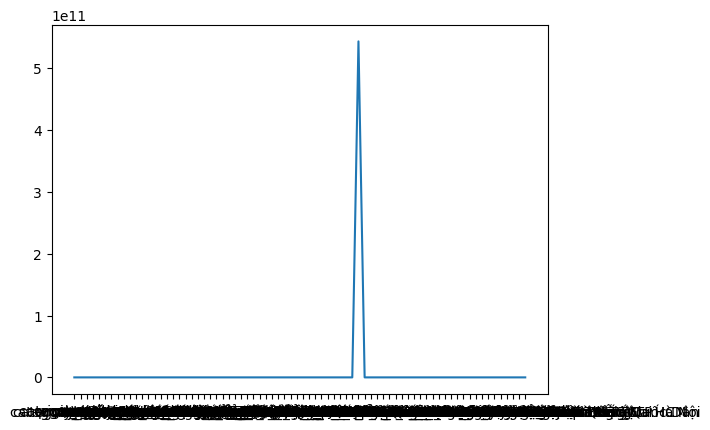

In [108]:
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(X_train.columns, lm.coef_)

In [111]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

param_grid = {
    "model__alpha":[0.001,0.01,0.1,1,10],
    "model__l1_ratio":[0.1,0.25,0.5,0.75,0.9]
}

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',ElasticNet(tol=0.2))]
pipe = Pipeline(Input)

search = GridSearchCV(pipe, param_grid, n_jobs=8)

search.fit(X_train, y_train)

best = search.best_estimator_

print("R^2 on training  data ",best.score(X_train, y_train))
print("R^2 on testing data ",best.score(X_test,y_test))


R^2 on training  data  0.39439108311925475
R^2 on testing data  0.3795525835728174


In [112]:
# The best model was found: 'model': ElasticNet(alpha=0.01, l1_ratio=0.75, tol=0.2),
best.get_params()

{'memory': None,
 'steps': [('polynomial', PolynomialFeatures(include_bias=False)),
  ('ss', StandardScaler()),
  ('model', ElasticNet(alpha=0.01, l1_ratio=0.75, tol=0.2))],
 'verbose': False,
 'polynomial': PolynomialFeatures(include_bias=False),
 'ss': StandardScaler(),
 'model': ElasticNet(alpha=0.01, l1_ratio=0.75, tol=0.2),
 'polynomial__degree': 2,
 'polynomial__include_bias': False,
 'polynomial__interaction_only': False,
 'polynomial__order': 'C',
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'model__alpha': 0.01,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__l1_ratio': 0.75,
 'model__max_iter': 1000,
 'model__positive': False,
 'model__precompute': False,
 'model__random_state': None,
 'model__selection': 'cyclic',
 'model__tol': 0.2,
 'model__warm_start': False}

# 4. Insights and key findings


In [ ]:
# R2 score for linear regression is negative
# R2 score for best fit regression (linear, ridge, lasso) was 0.3x, lower than expection to be used

# We could assume that the discount rate is not linear related to author, price, and another features in the data set

# 5. Next Steps


In [ ]:
# Next plan will be discovering more data about book may related to discount rate, like listing time, saled books, ...

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
